# Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [3.0,2.0]

#plotting settings
plot_params= {
    'figure.figsize': (10,8),
    'axes.labelsize': 15,
    'axes.grid': True,
    'grid.alpha': 0.2,
    'grid.linestyle':'--',
    'axes.grid.which': 'both',
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 13,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.major.size': 7,
    'xtick.minor.size': 3,
    'ytick.major.size': 7,
    'ytick.minor.size': 3,
    'axes.titlesize': 20,
    'xtick.major.size':5,
    'ytick.major.size':5,
    'xtick.major.pad':10,
    'ytick.major.pad':5,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    
}
plt.rcParams.update(plot_params)

common_settings = {
                   # LambdaCDM parameters
                   'H0':67.556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   # 'sigma8': 0.831,
                   'ln10^{10}A_s': 3.047,
                   'n_s': 0.9665,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
}


import os 
path_to_class_sz = os.getcwd() + '/../../'

## choose unWISE sample (blue, green, red)

In [27]:
color = "blue"

# unWISE HOD dictionary 

In [3]:
# best-fit from Kusiak et al. https://arxiv.org/pdf/2203.12583.pdf

HOD_blue = {
'sigma_log10M_HOD': 0.68660116,
'alpha_s_HOD':    1.3039425,
'M1_prime_HOD': 10**12.701308, # Msun/h
'M_min_HOD': 10**11.795964, # Msun/h
'M0_HOD' :0,
'x_out_truncated_nfw_profile_satellite_galaxies':  1.0868995,
'f_cen_HOD' : 1., 
    
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file': "/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt"
}

HOD_green = {
'alpha_s_HOD':  1.3023026,
'sigma_log10M_HOD':0.97260617,
'M1_prime_HOD': 10**13.440975,
'M_min_HOD':10**13.127660,
'M0_HOD' :0,
'x_out_truncated_nfw_profile_satellite_galaxies':2.7461961,
'f_cen_HOD' : 1., 
    
'galaxy_sample': 'unwise',
'galaxy_sample_id': "green",
'UNWISE_dndz_file': "/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt"
}

HOD_red = {

'sigma_log10M_HOD' :  0.40339510,
'alpha_s_HOD' :   1.6292653,
'M1_prime_HOD':  10** 13.518607,
'M_min_HOD': 10** 12.707242,
'M0_HOD' :0,
'x_out_truncated_nfw_profile_satellite_galaxies': 0.18379845,
'f_cen_HOD' : 1., 
    
'galaxy_sample': 'unwise',
'galaxy_sample_id': "red",
'UNWISE_dndz_file': "/Users/aleksandra/software/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt"
}

unWISE_common = {
'z_min': 0.005,
'z_max': 4,
'M_min': 7.0e8,
'M_max': 3.5e15,
    
# 'dlogell': 0.3,
'ell_max' : 9950.0,
'ell_min' : 50,
'dell': 50.,  
    
# precisions params:
'k_min_for_pk_class_sz' :  0.001,
'k_max_for_pk_class_sz' :  60.0,
'k_per_decade_class_sz' :  50,
'P_k_max_h/Mpc' :  50.0,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,
'ndim_masses': 150,
'ndim_redshifts': 150,

'hm_consistency': 1,
'delta for galaxies': "200c",
'delta for matter density': "200c",
'mass function': 'T08M200c',

#common hod params
'M0 equal M_min (HOD)':'no',
'x_out_truncated_nfw_profile': 1.0,
}


In [4]:
if color=="blue":
    HOD_dict = HOD_blue
if color=="green":
    HOD_dict = HOD_green
if color=="red":
    HOD_dict = HOD_red 

# Pressure profile dictionary 

In [23]:
# Battaglia et al. 2012 pressure profile

pp_B12 = {
        'pressure profile': 'B12', 
        'x_outSZ': 4,
        'truncate_wrt_rvir': 0,
        'P0_B12': 11,
        'concentration parameter': 'D08',
        #pressure precision
        'n_z_dydz' : 500,
        'n_z_pressure_profile': 80,
        'n_m_pressure_profile' : 80,
        'n_ell_pressure_profile' : 80,
        'pressure_profile_epsrel':1e-4,
        'pressure_profile_epsabs':1e-100
}


# Arnaud et al. 2010 pressure profile arXiv:0910.1234 
pp_a10 = {
        'pressure profile': 'A10', 
        'B': 1.53, #hydrostatic equilibrium bias (1-b)^-1     
        'concentration parameter': 'B13',
    
        #pressure precision
        'n_z_dydz' : 500,
        'n_z_pressure_profile': 80,
        'n_m_pressure_profile' : 80,
        'n_ell_pressure_profile' : 80,
        'pressure_profile_epsrel':1e-4,
        'pressure_profile_epsabs':1e-100
}


#Generalized NFW pressure profile
pp_gnfw = {  
    'pressure profile': 'Custom. GNFW',
    'P0GNFW': 8.130,
    'c500': 1.156,
    'alphaGNFW': 1.062,
    'betaGNFW':  5.4807,
    'gammaGNFW': 0.3292,
    'B': 1.6,
    
    #pressure precision
    'n_z_dydz' : 500,
    'n_z_pressure_profile': 80,
    'n_m_pressure_profile' : 80,
    'n_ell_pressure_profile' : 80,
    'pressure_profile_epsrel':1e-4,
    'pressure_profile_epsabs':1e-100
    }

# GNFW values to reproduce A10
#      ptsz->P0GNFW = 8.130;
#      ptsz->c500 = 1.156;
#      ptsz->gammaGNFW = 0.3292;
#      ptsz->alphaGNFW = 1.0620;
#      ptsz->betaGNFW = 5.4807;


# Compton y - galaxy power spectra (B12)

In [6]:
%%time
M = Class()
M.set(common_settings)
M.set(unWISE_common)
M.set(HOD_dict) 
M.set(pp_B12) 

M.set({
'output' : 'tSZ_gal_1h, tSZ_gal_2h',
})
      
M.compute()

cl_yg_b12 = M.cl_yg()

cl_ell_b12=np.array(cl_yg_b12['ell'])
cl_1h_b12=np.array(cl_yg_b12['1h'])
cl_2h_b12=np.array(cl_yg_b12['2h'])

cl_tot_b12=cl_1h_b12+cl_2h_b12

M.struct_cleanup()
M.empty()

CPU times: user 1min 38s, sys: 975 ms, total: 1min 39s
Wall time: 10.7 s


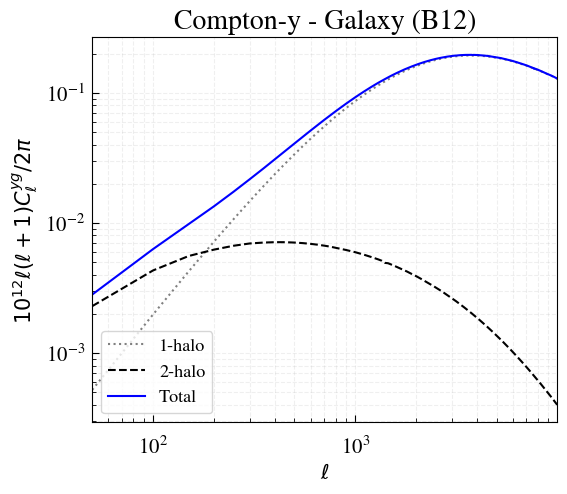

In [7]:
path_save= "/Users/aleksandra/Desktop/"

plt.figure(figsize=(6,5))
plt.xscale('log')
plt.yscale('log')

plt.plot(cl_ell_b12, cl_1h_b12, c='grey', label='1-halo', ls=':')
plt.plot(cl_ell_b12, cl_2h_b12, c='black', label='2-halo', ls='--')
plt.plot(cl_ell_b12, cl_tot_b12, c=color, label='Total')

plt.xlim([50, 9950])
plt.ylabel(r'$10^{12}\ell(\ell+1)C_{\ell}^{yg}/2\pi$')
plt.xlabel('$\ell$')
plt.title('Compton-y - Galaxy (B12)')
plt.legend(loc='lower left')
plt.savefig(path_save+'class_sz_tutorial_notebooks/figures/yg_unwise_'+color+'_b12.pdf')

# Compton y - galaxy power spectra (A10)

In [8]:
%%time
M = Class()
M.set(common_settings)
M.set(unWISE_common)
M.set(HOD_dict) 
M.set(pp_a10) 

M.set({
'output' : 'tSZ_gal_1h, tSZ_gal_2h',
})
      
M.compute()

cl_yg_a10 = M.cl_yg()

cl_ell_a10=np.array(cl_yg_a10['ell'])
cl_1h_a10=np.array(cl_yg_a10['1h'])
cl_2h_a10=np.array(cl_yg_a10['2h'])

cl_tot_a10=cl_1h_a10+cl_2h_a10

M.struct_cleanup()
M.empty()

CPU times: user 43.3 s, sys: 482 ms, total: 43.8 s
Wall time: 4.92 s


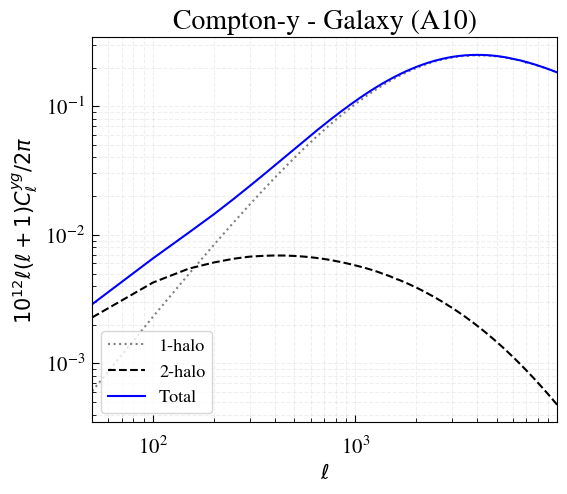

In [10]:
plt.figure(figsize=(6,5))
plt.xscale('log')
plt.yscale('log')

plt.plot(cl_ell_a10, cl_1h_a10, c='grey', label='1-halo', ls=':')
plt.plot(cl_ell_a10, cl_2h_a10, c='black', label='2-halo', ls='--')
plt.plot(cl_ell_a10, cl_tot_a10, c=color, label='Total')

plt.xlim([50, 9950])
plt.ylabel(r'$10^{12}\ell(\ell+1)C_{\ell}^{yg}/2\pi$')
plt.xlabel('$\ell$')
plt.title('Compton-y - Galaxy (A10)')
plt.legend(loc='lower left')
plt.legend(loc='lower left')
plt.savefig(path_save+'class_sz_tutorial_notebooks/figures/yg_unwise_'+color+'_a10.pdf')

# Compton y - galaxy power spectra (GNFW)

In [24]:
%%time
M = Class()
M.set(common_settings)
M.set(unWISE_common)
M.set(HOD_dict) 
M.set(pp_gnfw) 

M.set({
'output' : 'tSZ_gal_1h, tSZ_gal_2h',
})
      
M.compute()

cl_yg_gnfw = M.cl_yg()

cl_ell_gnfw=np.array(cl_yg_gnfw['ell'])
cl_1h_gnfw=np.array(cl_yg_gnfw['1h'])
cl_2h_gnfw=np.array(cl_yg_gnfw['2h'])

cl_tot_gnfw=cl_1h_gnfw+cl_2h_gnfw

M.struct_cleanup()
M.empty()

CPU times: user 47 s, sys: 684 ms, total: 47.7 s
Wall time: 5.15 s


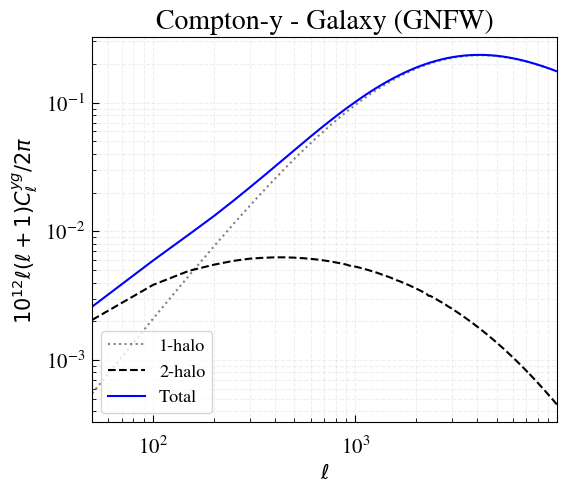

In [25]:
plt.figure(figsize=(6,5))
plt.xscale('log')
plt.yscale('log')

plt.plot(cl_ell_gnfw, cl_1h_gnfw, c='grey', label='1-halo', ls=':')
plt.plot(cl_ell_gnfw, cl_2h_gnfw, c='black', label='2-halo', ls='--')
plt.plot(cl_ell_gnfw, cl_tot_gnfw, c=color, label='Total')

plt.xlim([50, 9950])
plt.ylabel(r'$10^{12}\ell(\ell+1)C_{\ell}^{yg}/2\pi$')
plt.xlabel('$\ell$')
plt.title('Compton-y - Galaxy (GNFW)')
plt.legend(loc='lower left')
plt.legend(loc='lower left')
plt.savefig(path_save+'class_sz_tutorial_notebooks/figures/yg_unwise_'+color+'_gnfw.pdf')

# Compare different pressure profiles 

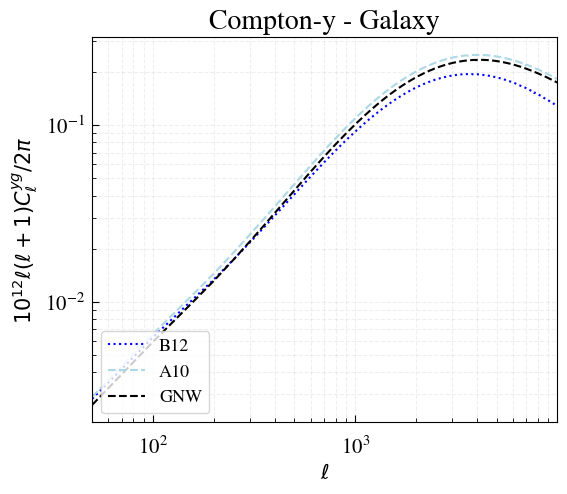

In [26]:
plt.figure(figsize=(6,5))
plt.xscale('log')
plt.yscale('log')

plt.plot(cl_ell_b12, cl_tot_b12, c='blue', label='B12', ls=':')
plt.plot(cl_ell_a10, cl_tot_a10, c='lightblue', label='A10', ls='--')
plt.plot(cl_ell_gnfw, cl_tot_gnfw, c='black', label='GNW', ls='--')

plt.xlim([50, 9950])
plt.ylabel(r'$10^{12}\ell(\ell+1)C_{\ell}^{yg}/2\pi$')
plt.xlabel('$\ell$')
plt.title('Compton-y - Galaxy')
plt.legend(loc='lower left')
plt.legend(loc='lower left')
plt.savefig(path_save+'class_sz_tutorial_notebooks/figures/yg_unwise_blue_compare_pp.pdf')

In [ ]:
# plot_dim = int(1/2*(-1 + np.sqrt(1 + 8*len(cl_galn_galn.keys()))))
# fig, axes = plt.subplots(figsize=(7, 7), sharex=True, 
#                          sharey=True, 
#                          ncols=plot_dim, 
#                          nrows=plot_dim,
#                          )
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)
# # x = np.linspace(0, 10, 100)
# ik = 0
# for i in range(plot_dim):
#     for j in range(plot_dim):
#         if i<j:
#             axes[i, j].axis('off')
#         else:
#             kk = list(cl_galn_galn.keys())[ik]
            
#             # axes[i, j].plot(x, np.sin((i+j) *x))
#             strp = list(cl_galn_galn.keys())[ik]
#             kt = dict_names[strp.split('x')[0]]+' x '+dict_names[strp.split('x')[1]]
#             ik+=1
#             axes[i, j].set_title(kt,size=12)
#             axes[i, j].set_xlabel(r"$\ell$",fontsize=14)
#             axes[i, j].set_ylabel(r"$C_l^{gxg} \,\,\, [units]$",fontsize=14)

#             axes[i, j].grid()
#             #
#             cl = cl_galn_galn[kk]
#             fac = np.asarray(cl['ell'])*(np.asarray(cl['ell'])+1.)/2./np.pi

#             axes[i, j].loglog(cl['ell'],np.asarray(cl['1h'])/fac,'k-',label=r'1h')
#             axes[i, j].loglog(cl['ell'],np.asarray(cl['2h'])/fac,'r-',label=r'2h')
#             axes[i, j].legend(loc=1,fontsize=8)
# fig.suptitle('CLASS_SZ y-Galaxy (B12)',fontsize=20)
# fig.tight_layout()
# plt.savefig(path_save+'/class_sz_tutorial_notebooks/figures/class_sz_unwise_hod_gg.pdf')